# Cardiovascular Risk Prediction 

# PROBLEM STATEMENT 
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors. 

<img src="" style ="width:900px;height:1000" title="CARDIOVASCULAR RISK">

# IMPORTING LIBRARIES

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set()


In [25]:
path = 'data_cardiovascular_risk.csv'

cardio = pd.read_csv(path,index_col='id')

# Dataset Inspection

In [27]:

cardio.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [29]:
cardio.shape

(3390, 16)

In [31]:
len(cardio[cardio.duplicated()])

0

In [33]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


In [35]:
cardio.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,3390.0,NaN,NaN,NaN,49.542183,8.592878,32.0,42.0,49.0,56.0,70.0
education,3303.0,NaN,NaN,NaN,1.970936,1.019081,1.0,1.0,2.0,3.0,4.0
sex,3390,2,F,1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_smoking,3390,2,NO,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cigsPerDay,3368.0,NaN,NaN,NaN,9.069477,11.879078,0.0,0.0,0.0,20.0,70.0
BPMeds,3346.0,NaN,NaN,NaN,0.029886,0.170299,0.0,0.0,0.0,0.0,1.0
prevalentStroke,3390.0,NaN,NaN,NaN,0.00649,0.080309,0.0,0.0,0.0,0.0,1.0
prevalentHyp,3390.0,NaN,NaN,NaN,0.315339,0.464719,0.0,0.0,0.0,1.0,1.0
diabetes,3390.0,NaN,NaN,NaN,0.025664,0.158153,0.0,0.0,0.0,0.0,1.0
totChol,3352.0,NaN,NaN,NaN,237.074284,45.24743,107.0,206.0,234.0,264.0,696.0


In [37]:
cardio.isna().sum().sum()

510

In [39]:
cardio.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<Axes: ylabel='id'>

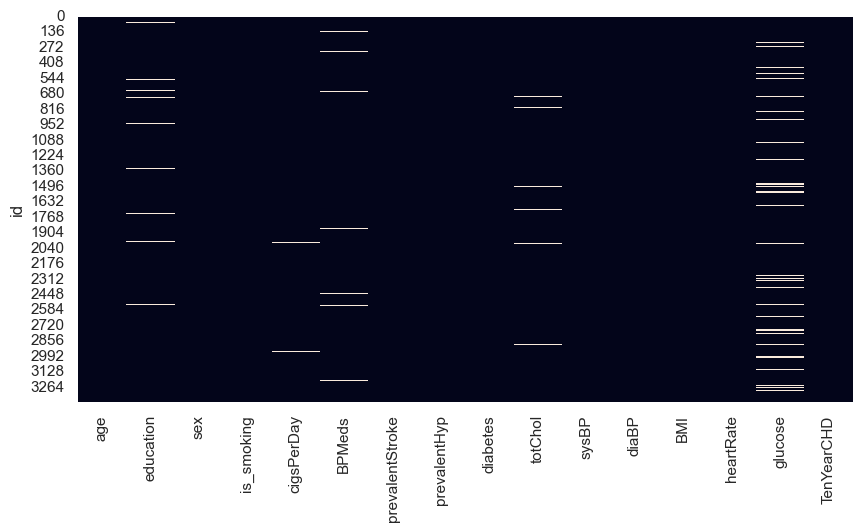

In [41]:
plt.figure(figsize=(10,5))
sns.heatmap(cardio.isnull(), cbar=False)

# Data Cleaning

In [43]:
cardio.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [45]:
cardio.describe(include='all')

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


In [47]:
cardio.rename(columns={'cigsPerDay':'cigs_per_day','BPMeds':'bp_meds',
                   'prevalentStroke':'prevalent_stroke','prevalentHyp':'prevalent_hyp',
                   'totChol':'total_cholesterol','sysBP':'systolic_bp','diaBP':'diastolic_bp',
                   'BMI':'bmi','heartRate':'heart_rate','TenYearCHD':'ten_year_chd'},
          inplace = True)

In [49]:
for i in cardio.columns.tolist():
  print("Unique values in",i,":",cardio[i].nunique())

Unique values in age : 39
Unique values in education : 4
Unique values in sex : 2
Unique values in is_smoking : 2
Unique values in cigs_per_day : 32
Unique values in bp_meds : 2
Unique values in prevalent_stroke : 2
Unique values in prevalent_hyp : 2
Unique values in diabetes : 2
Unique values in total_cholesterol : 240
Unique values in systolic_bp : 226
Unique values in diastolic_bp : 142
Unique values in bmi : 1259
Unique values in heart_rate : 68
Unique values in glucose : 132
Unique values in ten_year_chd : 2


In [51]:
dependent_var = ['ten_year_chd']
continuous_var = ['age','cigs_per_day','total_cholesterol','systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose']
categorical_var = ['education', 'sex', 'is_smoking','bp_meds','prevalent_stroke', 'prevalent_hyp', 'diabetes']

In [53]:
cardio['sex'] = np.where(cardio['sex'] == 'M',1,0)
cardio['is_smoking'] = np.where(cardio['is_smoking'] == 'YES',1,0)

# Handling missing data

# 1.Replacing the missing values with mode

In [55]:
cardio['education'] = cardio['education'].fillna(cardio['education'].mode()[0])
cardio['bp_meds'] = cardio['bp_meds'].fillna(cardio['bp_meds'].mode()[0])

In [57]:
cardio.education.value_counts()

education
1.0    1478
2.0     990
3.0     549
4.0     373
Name: count, dtype: int64

In [59]:
cardio.bp_meds.value_counts()

bp_meds
0.0    3290
1.0     100
Name: count, dtype: int64

# 2.cigs_per_day

In [61]:
cardio.cigs_per_day.mean().round(0),cardio.cigs_per_day.median()

(9.0, 0.0)

In [63]:
cardio[cardio['cigs_per_day'].isna()]

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
id,,,,,,,,,,,,,,,,
422,55,1.0,0,1,NaN,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,45,3.0,1,1,NaN,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,42,1.0,1,1,NaN,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,NaN,0
491,61,1.0,0,1,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,41,1.0,0,1,NaN,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0
767,54,1.0,1,1,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1461,47,2.0,0,1,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0
1467,49,1.0,0,1,NaN,0.0,0,0,0,252.0,123.0,69.0,21.45,72.0,89.0,0
1597,57,1.0,0,1,NaN,0.0,0,0,0,229.0,115.0,69.0,24.43,80.0,93.0,0


From the above table, we find that for every instance of missing values in cigs per day, the patients reported that they smoke.

Let's check the mean and median number of cigarettes smoked by patients, who reported that they smoke.

In [65]:
cardio[cardio['is_smoking']==1]['cigs_per_day'].mean(),cardio[cardio['is_smoking']==1]['cigs_per_day'].median()

(18.345945945945946, 20.0)

# . Mean number of cigarettes for a smoker = 18.34
# . Median number of cigarettes for a smoker = 20

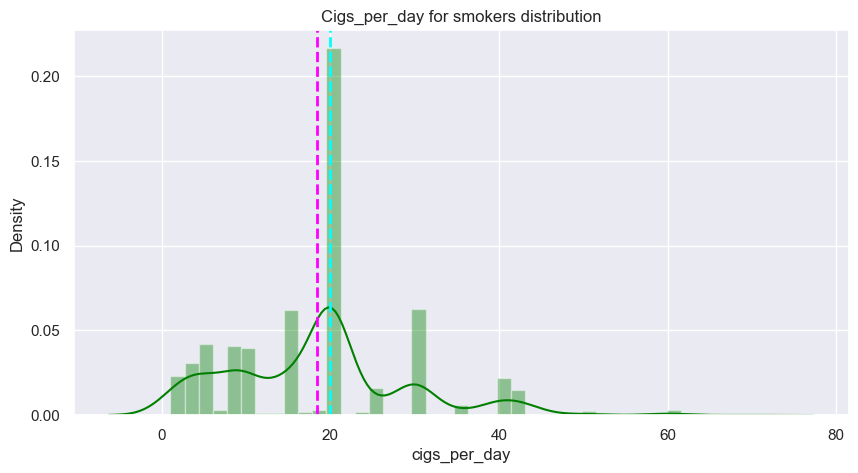

In [67]:
plt.figure(figsize=(10,5))
sns.distplot(cardio[cardio['is_smoking']==1]['cigs_per_day'], color='green')
plt.axvline(cardio[cardio['is_smoking']==1]['cigs_per_day'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(cardio[cardio['is_smoking']==1]['cigs_per_day'].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.title('Cigs_per_day for smokers distribution')
plt.show()

Since the number of cigarettes smoked by the patients who smoke contains outliers, the missing values in ths cigs_per_day column can be imputed with its median value.

<Axes: xlabel='cigs_per_day'>

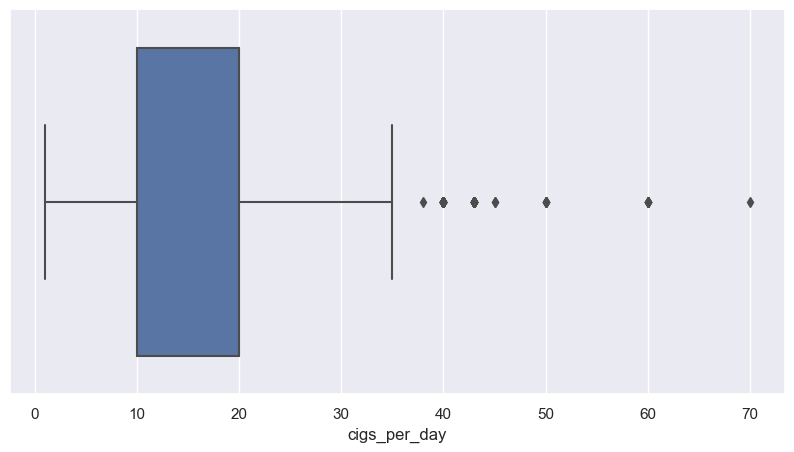

In [69]:
plt.figure(figsize=(10,5))
sns.boxplot(x=cardio[cardio['is_smoking']==1]['cigs_per_day'])

In [71]:
cardio['cigs_per_day'] = cardio['cigs_per_day'].fillna(cardio[cardio['is_smoking']==1]['cigs_per_day'].median())

In [73]:
cardio[(cardio['is_smoking']==0) & (cardio['cigs_per_day']>0)]

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
id,,,,,,,,,,,,,,,,


In [75]:
cardio[(cardio['is_smoking']==1) & (cardio['cigs_per_day']==0)]

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
id,,,,,,,,,,,,,,,,


# 3.Total_cholestrol, bmi, heart_rate

In [87]:
cardio['total_cholesterol'] = cardio['total_cholesterol'].fillna(cardio['total_cholesterol'].median())
cardio['bmi'] = cardio['bmi'].fillna(cardio['bmi'].median())
cardio['heart_rate'] = cardio['heart_rate'].fillna(cardio['heart_rate'].median())

In [89]:
cardio.total_cholesterol.mean(),cardio.total_cholesterol.median()

(237.03982300884957, 234.0)

In [91]:
cardio.bmi.mean(),cardio.bmi.median()

(25.793250737463126, 25.38)

In [93]:
cardio.heart_rate.mean(),cardio.heart_rate.median()

(75.97699115044247, 75.0)

In [95]:
cardio.glucose.isna().sum()

304

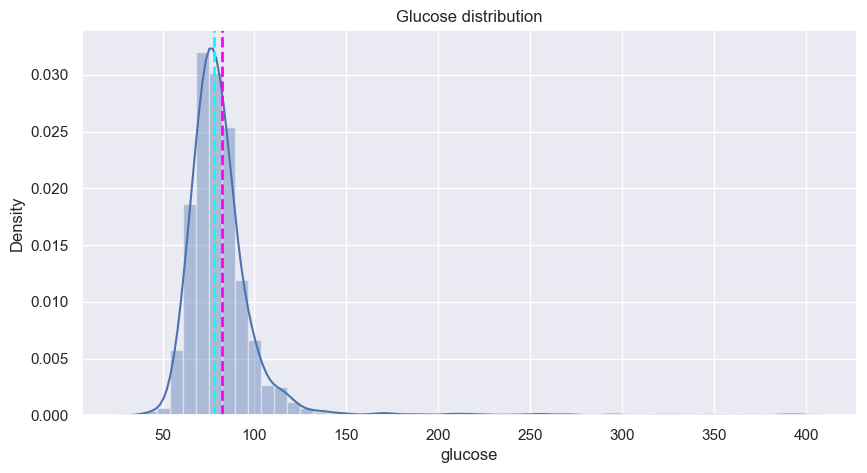

In [97]:
plt.figure(figsize=(10,5))
sns.distplot(cardio['glucose'])
plt.axvline(cardio['glucose'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(cardio['glucose'].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.title('Glucose distribution')
plt.show()

Text(0.5, 1.0, 'Glucose boxplot')

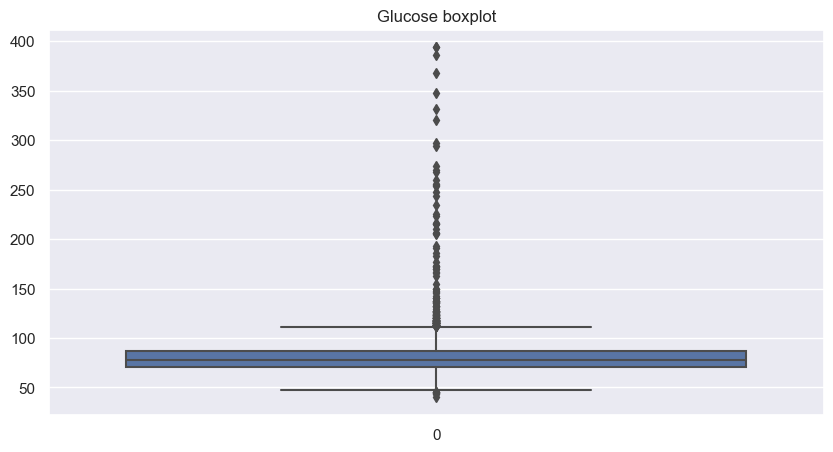

In [99]:
plt.figure(figsize=(10,5))
sns.boxplot(cardio['glucose'])
plt.title('Glucose boxplot')

In [101]:
cardio.glucose.mean(),cardio.glucose.median(),cardio.glucose.mode()

(82.08651976668827,
 78.0,
 0    75.0
 Name: glucose, dtype: float64)

In [103]:
imputer = KNNImputer(n_neighbors=10)
imputed = imputer.fit_transform(cardio)
cardio = pd.DataFrame(imputed, columns=cardio.columns)     

In [105]:
cardio.glucose.mean(),cardio.glucose.median(),cardio.glucose.mode()

(82.04327433628319,
 78.0,
 0    75.0
 Name: glucose, dtype: float64)

In [107]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3390 non-null   float64
 1   education          3390 non-null   float64
 2   sex                3390 non-null   float64
 3   is_smoking         3390 non-null   float64
 4   cigs_per_day       3390 non-null   float64
 5   bp_meds            3390 non-null   float64
 6   prevalent_stroke   3390 non-null   float64
 7   prevalent_hyp      3390 non-null   float64
 8   diabetes           3390 non-null   float64
 9   total_cholesterol  3390 non-null   float64
 10  systolic_bp        3390 non-null   float64
 11  diastolic_bp       3390 non-null   float64
 12  bmi                3390 non-null   float64
 13  heart_rate         3390 non-null   float64
 14  glucose            3390 non-null   float64
 15  ten_year_chd       3390 non-null   float64
dtypes: float64(16)
memory us

In [109]:
cardio = cardio.astype({'age': int, 'education':int,'sex':int,'is_smoking':int,'cigs_per_day':int,
               'bp_meds':int,'prevalent_stroke':int,'prevalent_hyp':int,'diabetes':int,
               'total_cholesterol':float,'systolic_bp':float,'diastolic_bp':float,
               'bmi':float,'heart_rate':float,'glucose':float,'ten_year_chd':int})
     

# 4.glucose

In [111]:
cardio.isna().sum()

age                  0
education            0
sex                  0
is_smoking           0
cigs_per_day         0
bp_meds              0
prevalent_stroke     0
prevalent_hyp        0
diabetes             0
total_cholesterol    0
systolic_bp          0
diastolic_bp         0
bmi                  0
heart_rate           0
glucose              0
ten_year_chd         0
dtype: int64

Text(0.5, 1.0, 'ten_year_chd distribution')

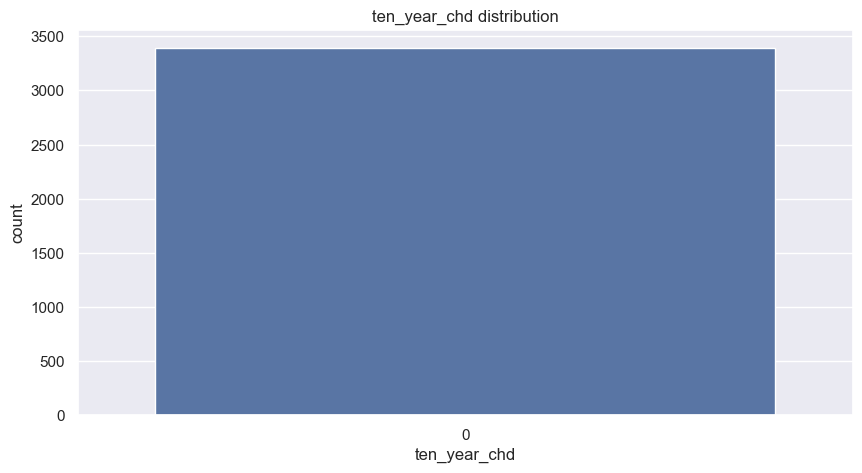

In [113]:
plt.figure(figsize=(10,5))
sns.countplot(cardio[dependent_var[0]])
plt.xlabel(dependent_var[0])
plt.title(dependent_var[0]+' distribution')

In [115]:
cardio[dependent_var].value_counts()

ten_year_chd
0               2879
1                511
Name: count, dtype: int64

In [117]:
511/(2879+511)

0.15073746312684366

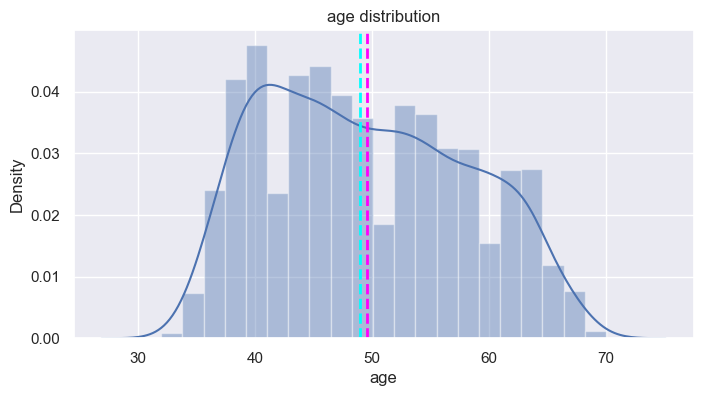

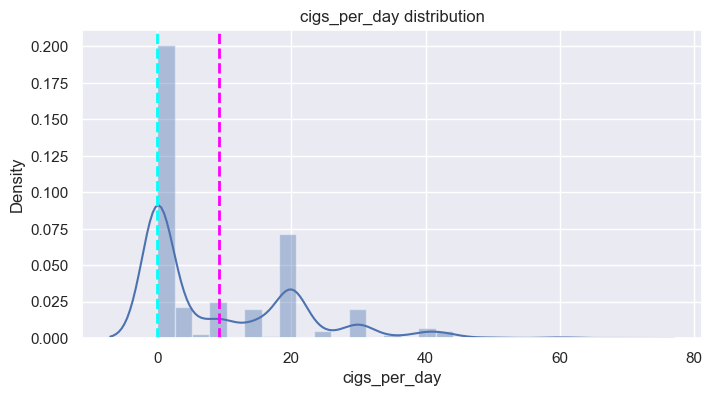

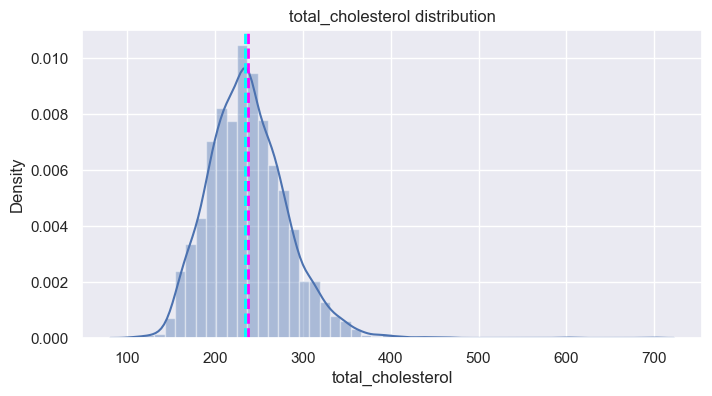

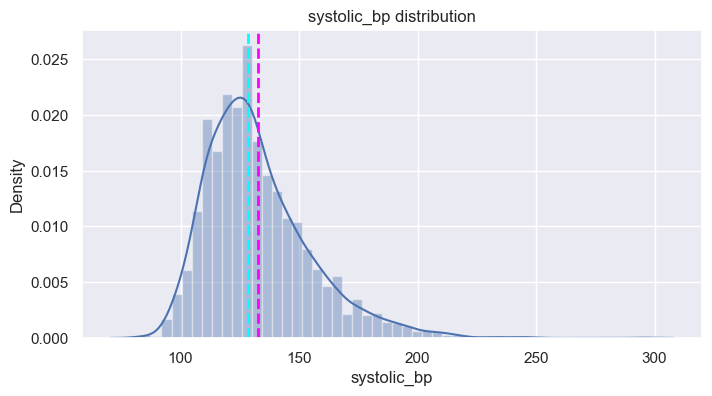

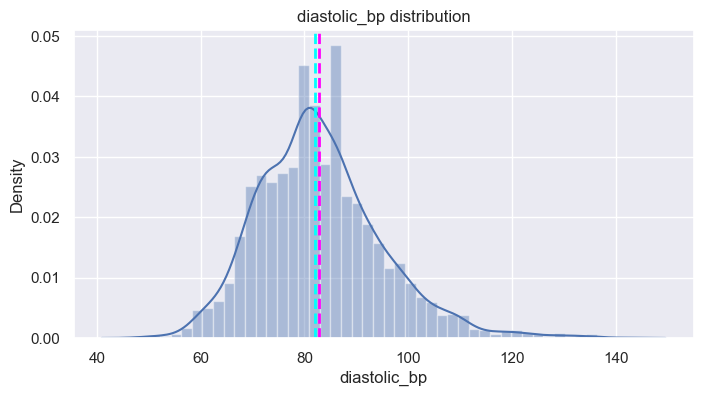

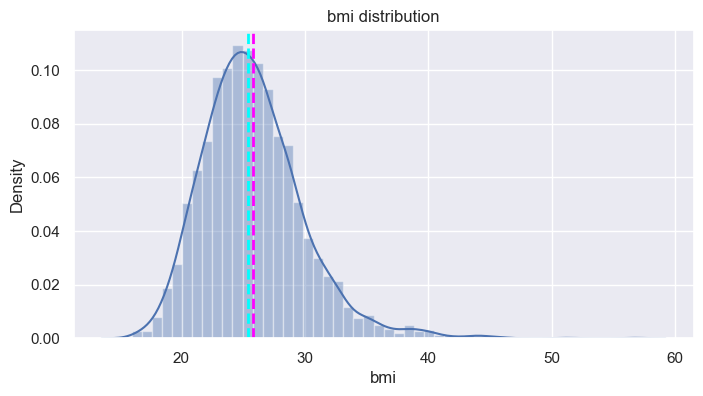

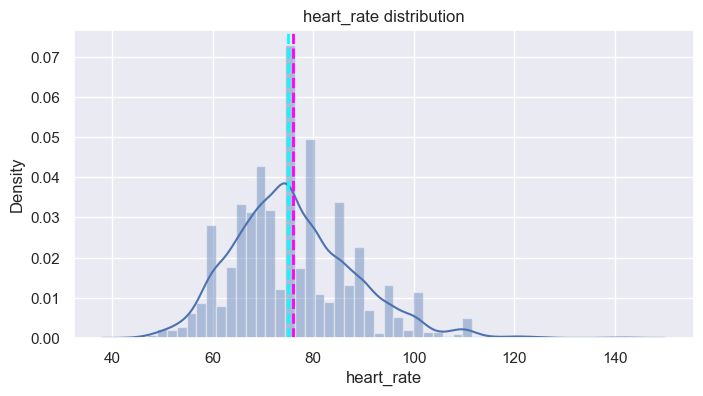

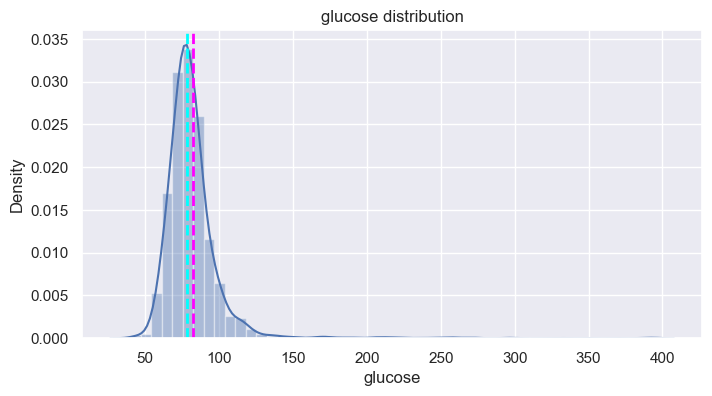

In [119]:
for col in continuous_var:
  plt.figure(figsize=(8,4))
  sns.distplot(cardio[col])
  plt.axvline(cardio[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(cardio[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

<Figure size 1000x500 with 0 Axes>

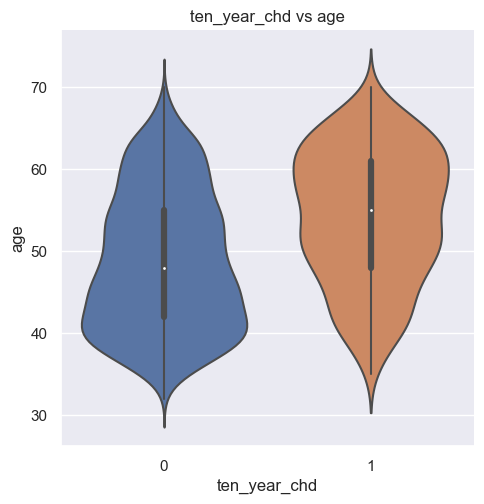

<Figure size 1000x500 with 0 Axes>

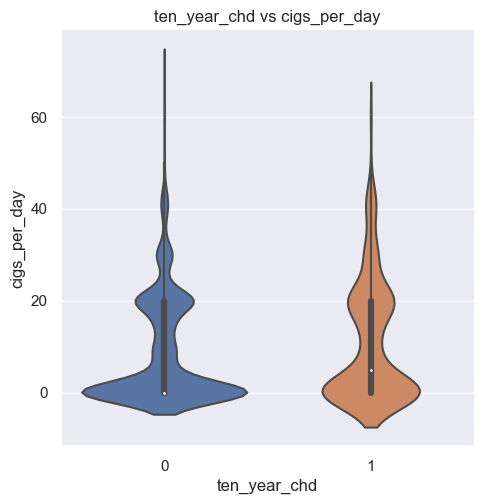

<Figure size 1000x500 with 0 Axes>

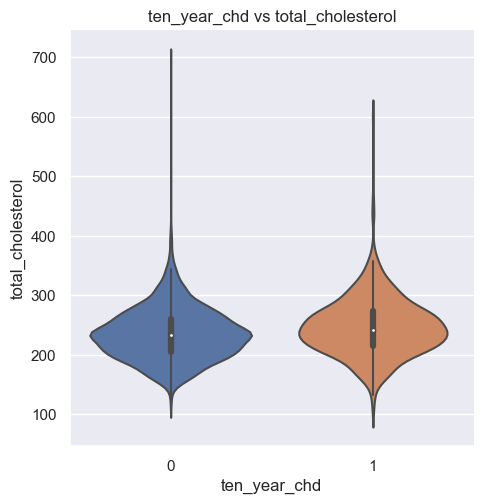

<Figure size 1000x500 with 0 Axes>

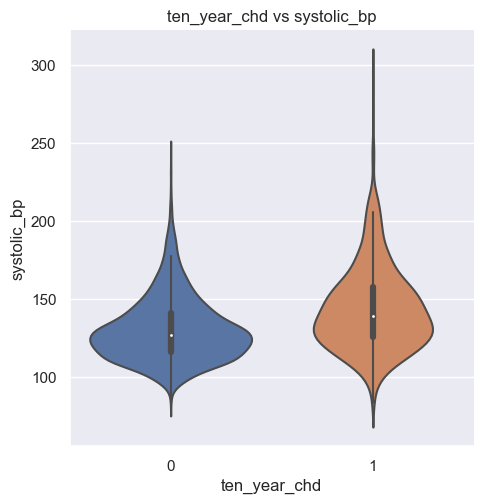

<Figure size 1000x500 with 0 Axes>

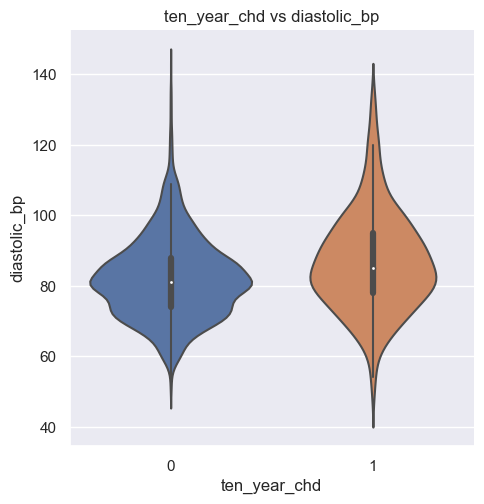

<Figure size 1000x500 with 0 Axes>

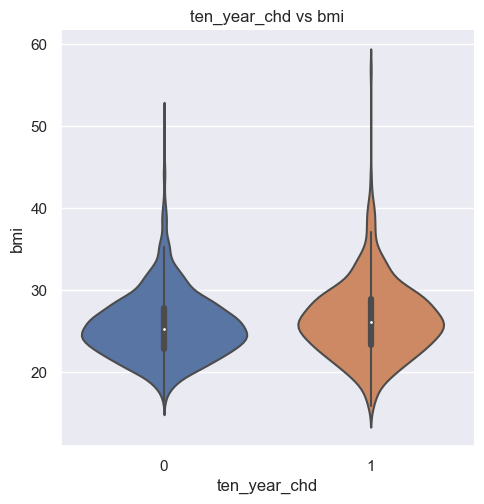

<Figure size 1000x500 with 0 Axes>

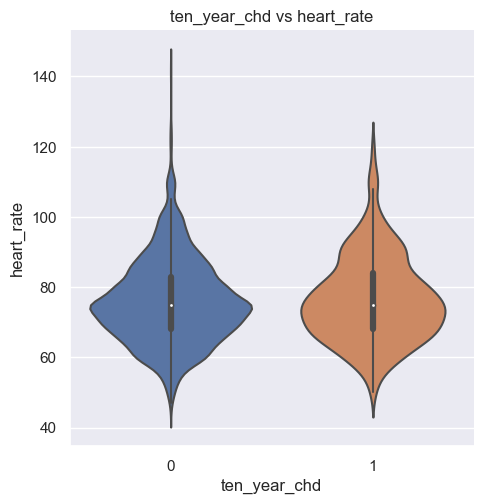

<Figure size 1000x500 with 0 Axes>

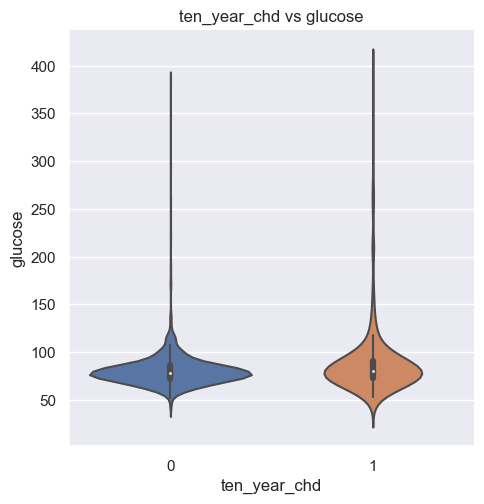

In [121]:
for i in continuous_var:
  plt.figure(figsize=(10,5))
  sns.catplot(x=dependent_var[0],y=i,data=cardio,kind='violin')
  plt.ylabel(i)
  plt.xlabel(dependent_var[0])
  plt.title(dependent_var[0]+' vs '+i)
  plt.show()

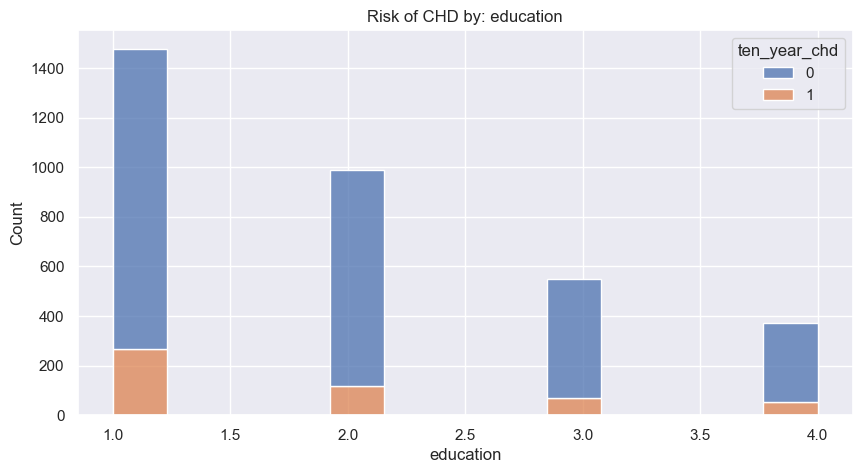

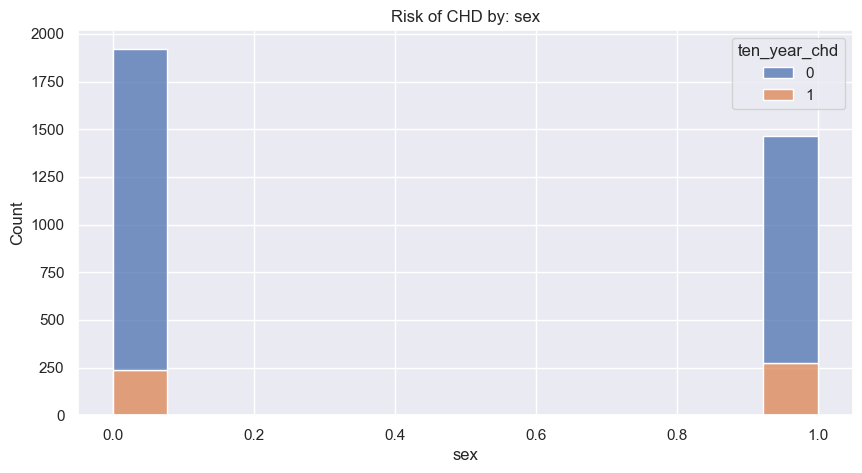

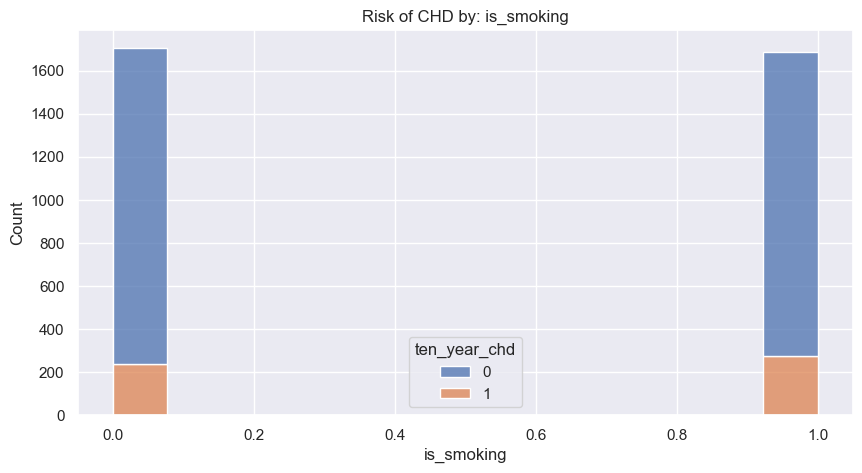

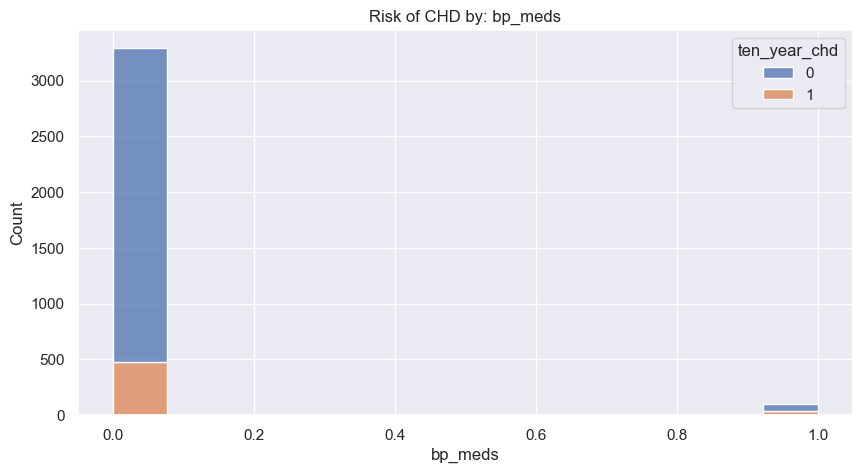

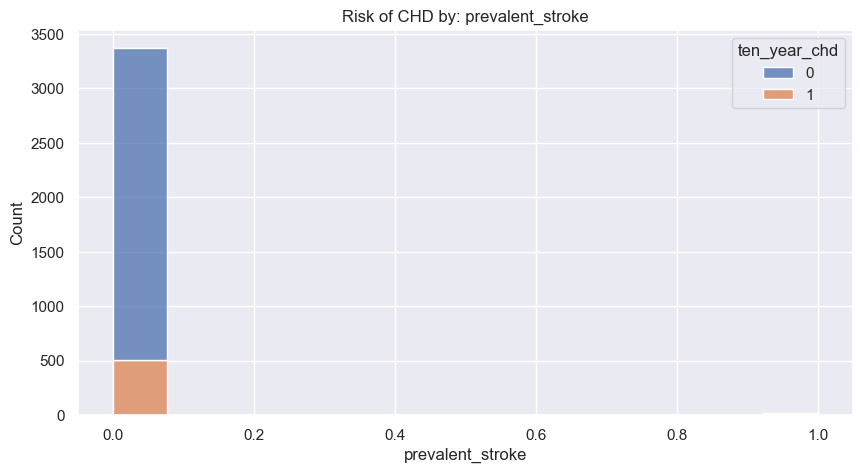

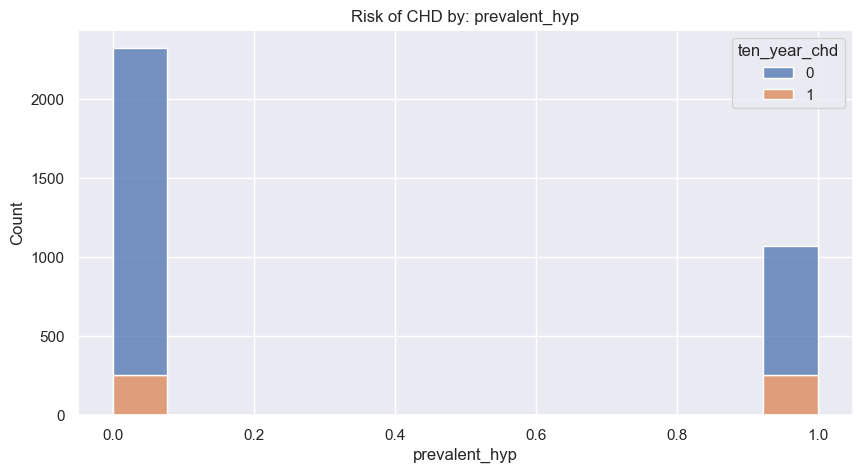

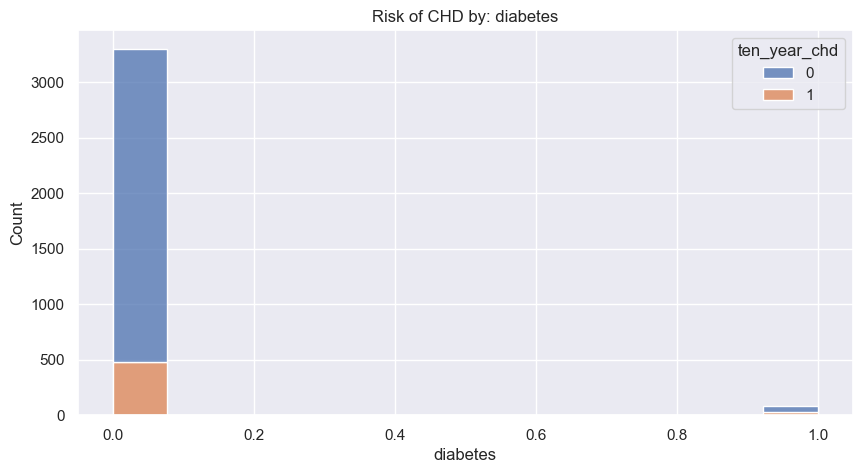

In [123]:
for i in categorical_var:
  plt.figure(figsize=(10,5))
  sns.histplot(x=i, hue=dependent_var[0], data=cardio, stat="count", multiple="stack")
  plt.title('Risk of CHD by: '+i)
  # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=i)
  plt.show()

<Figure size 1000x500 with 0 Axes>

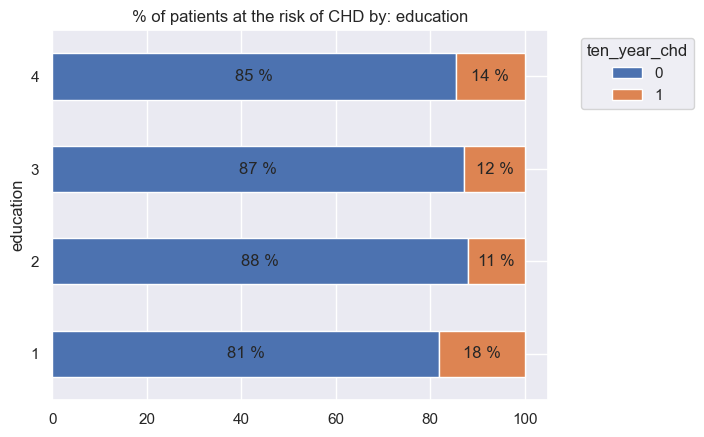

<Figure size 1000x500 with 0 Axes>

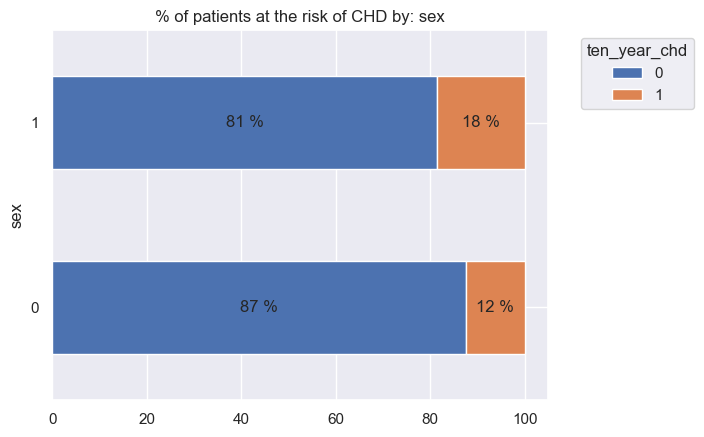

<Figure size 1000x500 with 0 Axes>

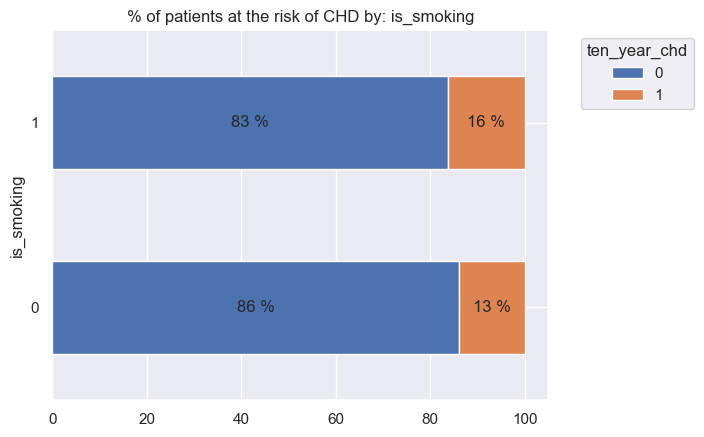

<Figure size 1000x500 with 0 Axes>

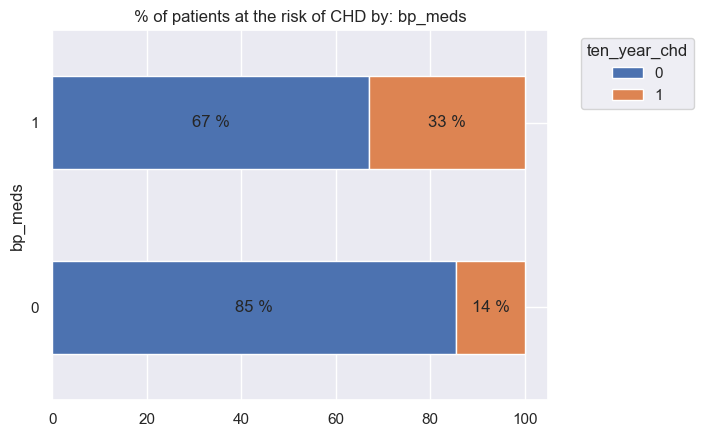

<Figure size 1000x500 with 0 Axes>

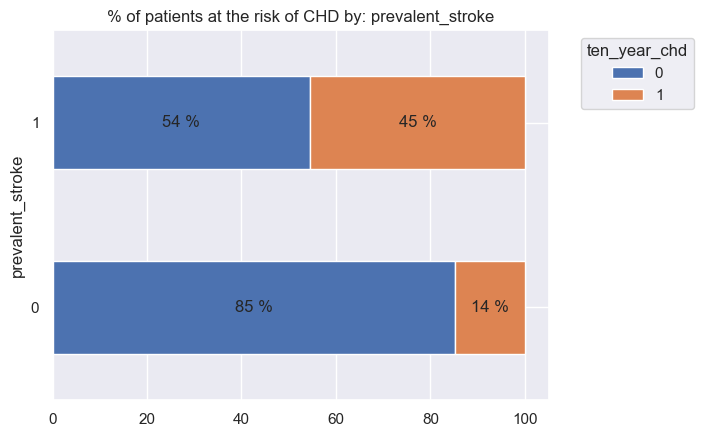

<Figure size 1000x500 with 0 Axes>

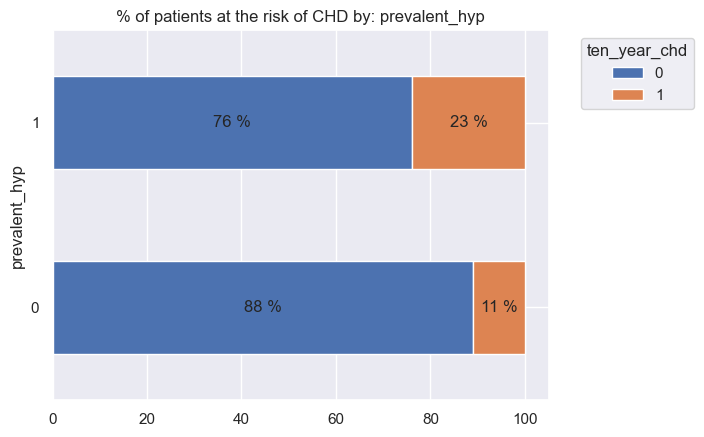

<Figure size 1000x500 with 0 Axes>

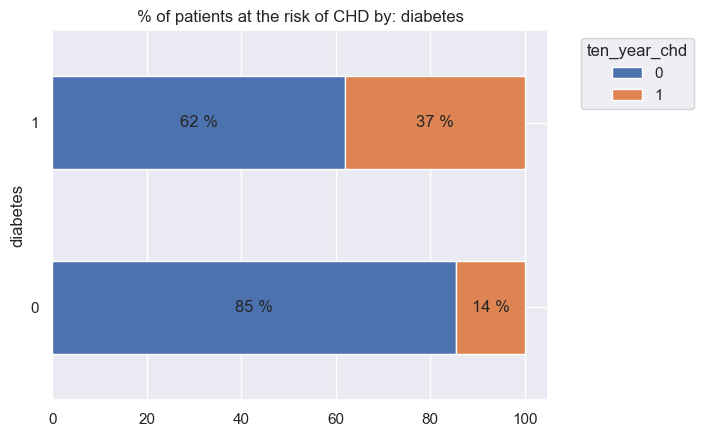

In [125]:
for i in categorical_var:
    x_var, y_var = i, dependent_var[0]
    plt.figure(figsize=(10,5))
    cardio_grouped = cardio.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)*100
    cardio_grouped.plot.barh(stacked=True)
    plt.legend(
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        title=y_var)

    plt.title("% of patients at the risk of CHD by: "+i)
    for ix, row in cardio_grouped.reset_index(drop=True).iterrows():
        # print(ix, row)
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix,
                    f"{int(element)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element
    plt.show()

<Axes: title={'center': 'Correlation Analysis'}>

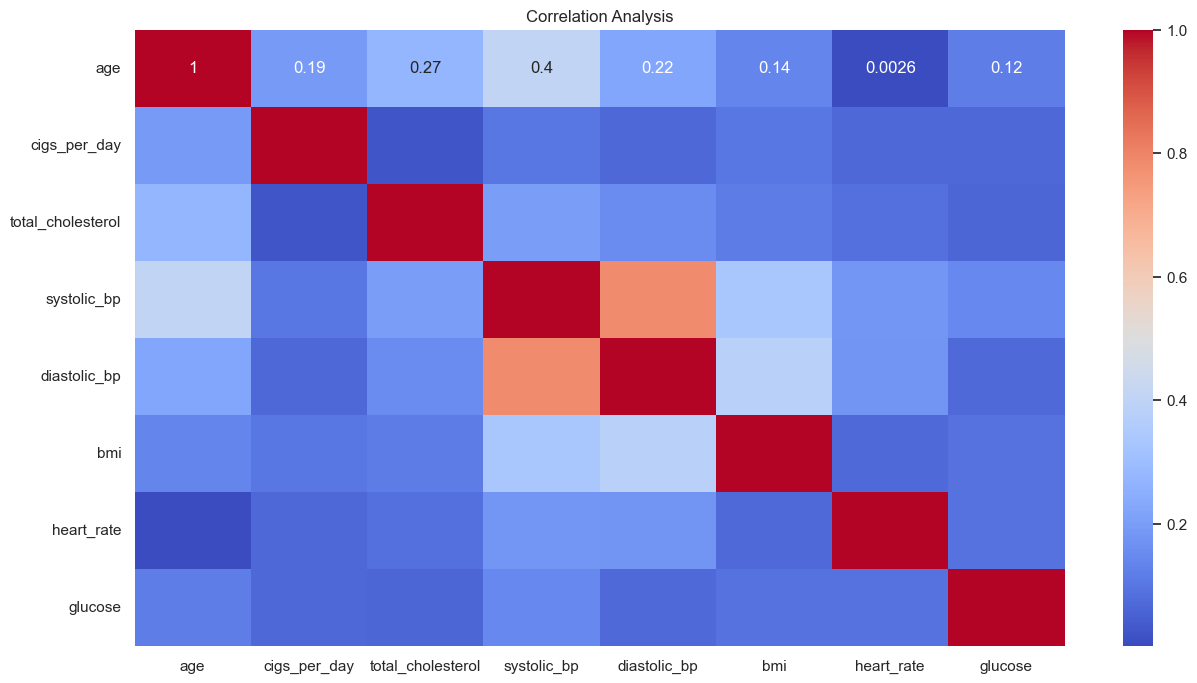

In [127]:
plt.figure(figsize=(15,8))
plt.title('Correlation Analysis')
correlation = cardio[continuous_var].corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [129]:
print(cardio['systolic_bp'].min(),cardio['systolic_bp'].max())
print(cardio['diastolic_bp'].min(),cardio['diastolic_bp'].max())

83.5 295.0
48.0 142.5


In [131]:
cardio['pulse_pressure'] = cardio['systolic_bp']-cardio['diastolic_bp']
cardio.drop('systolic_bp',axis=1,inplace=True)
cardio.drop('diastolic_bp',axis=1,inplace=True)

In [133]:
cardio.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigs_per_day', 'bp_meds',
       'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'total_cholesterol',
       'bmi', 'heart_rate', 'glucose', 'ten_year_chd', 'pulse_pressure'],
      dtype='object')

Text(0.5, 1.0, 'Pulse Pressure Distribution')

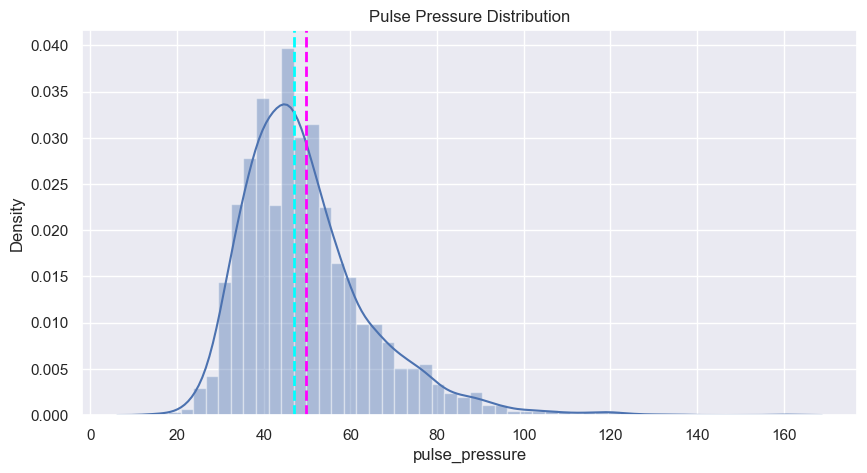

In [135]:
continuous_var.remove('systolic_bp')
continuous_var.remove('diastolic_bp')
continuous_var.append('pulse_pressure')
plt.figure(figsize=(10,5))
sns.distplot(cardio['pulse_pressure'])
plt.axvline(cardio['pulse_pressure'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(cardio['pulse_pressure'].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.title('Pulse Pressure Distribution')

<Figure size 1000x500 with 0 Axes>

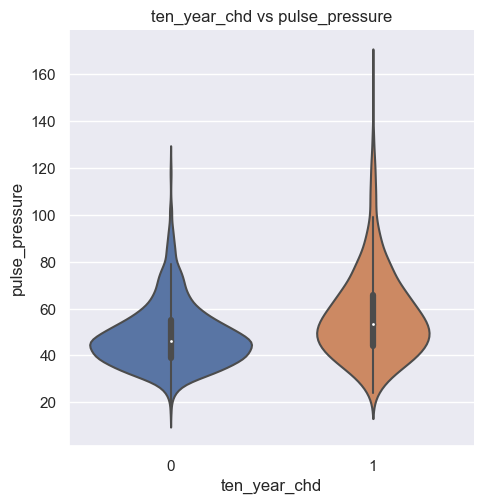

In [137]:
plt.figure(figsize=(10,5))
sns.catplot(x=dependent_var[0],y='pulse_pressure',data=cardio,kind='violin')
plt.title('ten_year_chd vs pulse_pressure')
plt.show()

<Axes: title={'center': 'Correlation Analysis'}>

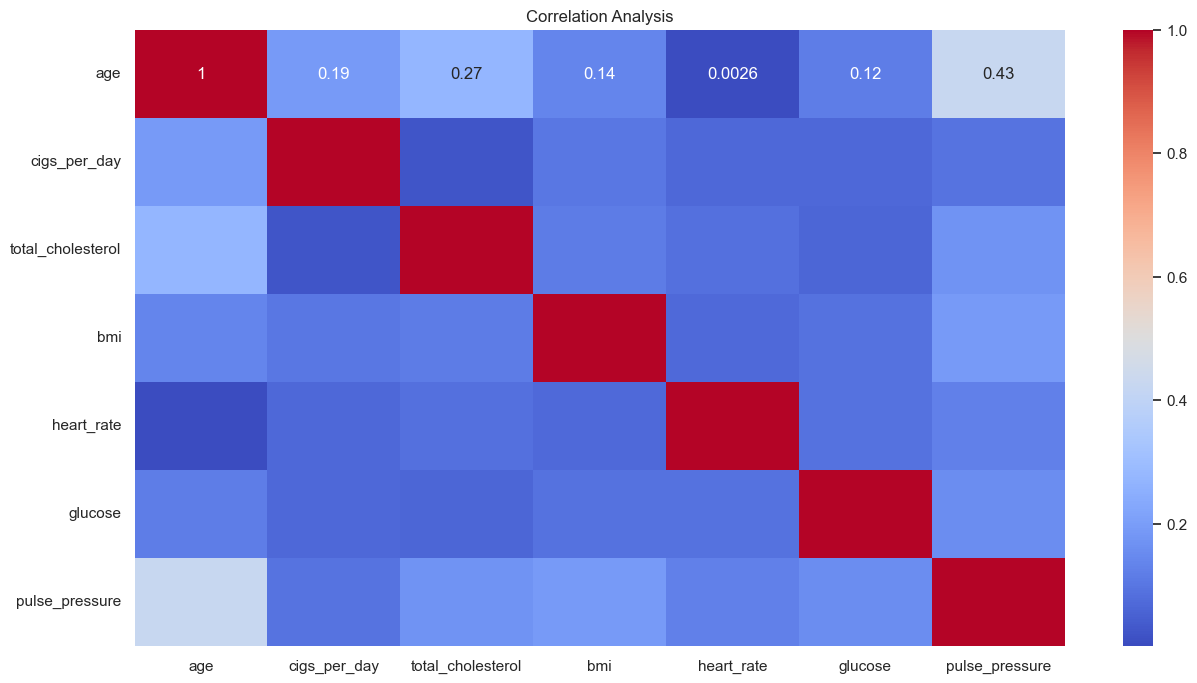

In [139]:
plt.figure(figsize=(15,8))
plt.title('Correlation Analysis')
correlation = cardio[continuous_var].corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')


In [141]:
chi_scores = chi2(cardio[categorical_var],cardio[dependent_var])
chi_scores
     

(array([ 4.76184162, 13.77838959,  1.98522603, 25.10243827, 15.8619983 ,
        64.37770831, 35.50630598]),
 array([2.90973990e-02, 2.05688680e-04, 1.58840936e-01, 5.43640748e-07,
        6.81331780e-05, 1.02713702e-15, 2.54226209e-09]))

In [143]:
p_values = pd.Series(chi_scores[1],index = cardio[categorical_var].columns)
p_values.sort_values(ascending = False , inplace = True)
p_values

is_smoking          1.588409e-01
education           2.909740e-02
sex                 2.056887e-04
prevalent_stroke    6.813318e-05
bp_meds             5.436407e-07
diabetes            2.542262e-09
prevalent_hyp       1.027137e-15
dtype: float64

<Axes: title={'center': 'P-value for discrete features'}>

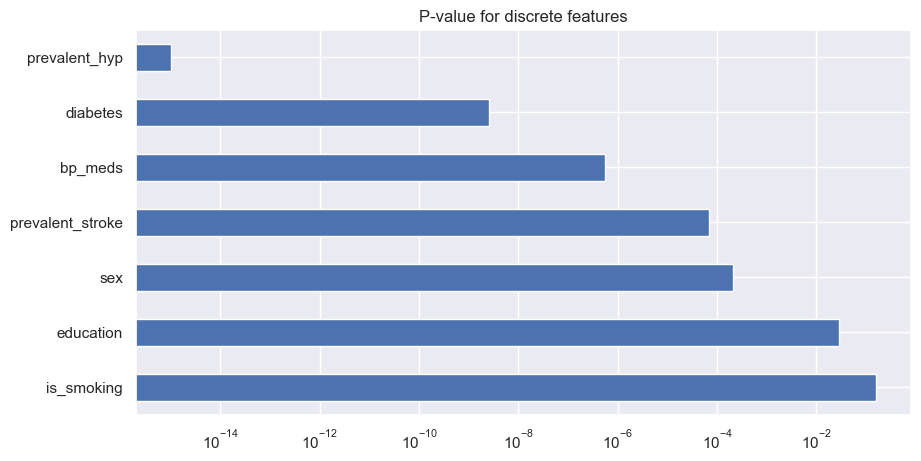

In [145]:
plt.figure(figsize=(10,5))
plt.xscale('log')
plt.xlabel('P-value')
plt.title('P-value for discrete features')
p_values.plot.barh()

In [147]:
cardio.drop('is_smoking',axis=1,inplace=True)
     

In [149]:
categorical_var.remove('is_smoking')
categorical_var
     

['education',
 'sex',
 'bp_meds',
 'prevalent_stroke',
 'prevalent_hyp',
 'diabetes']

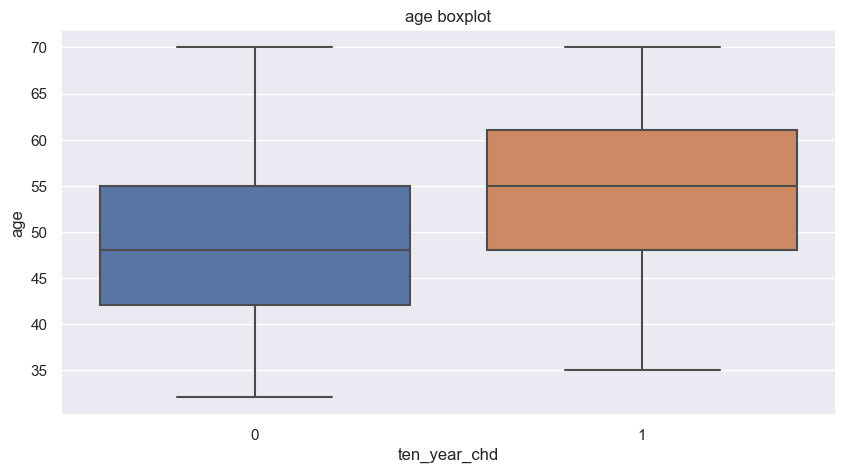

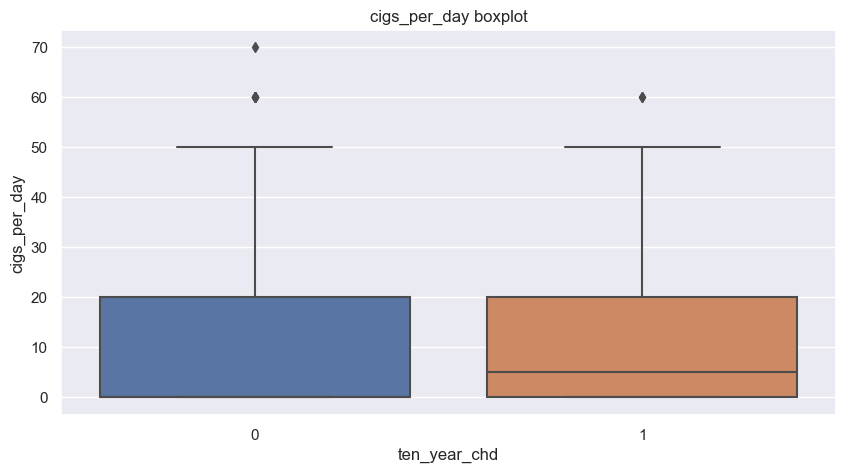

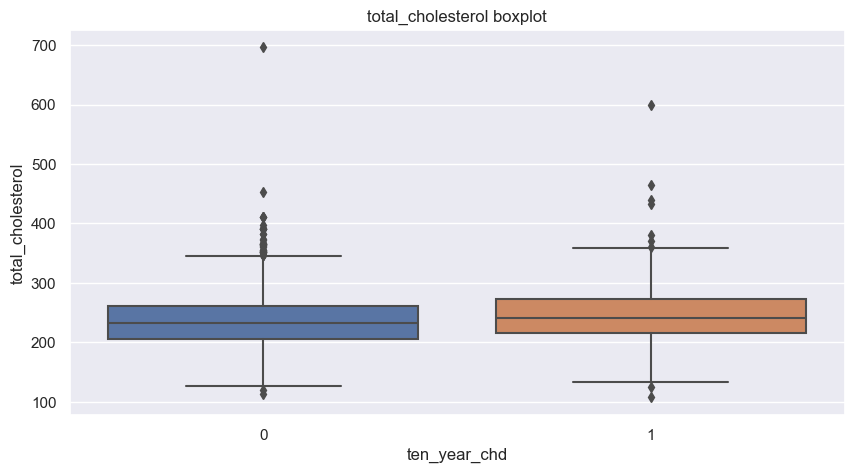

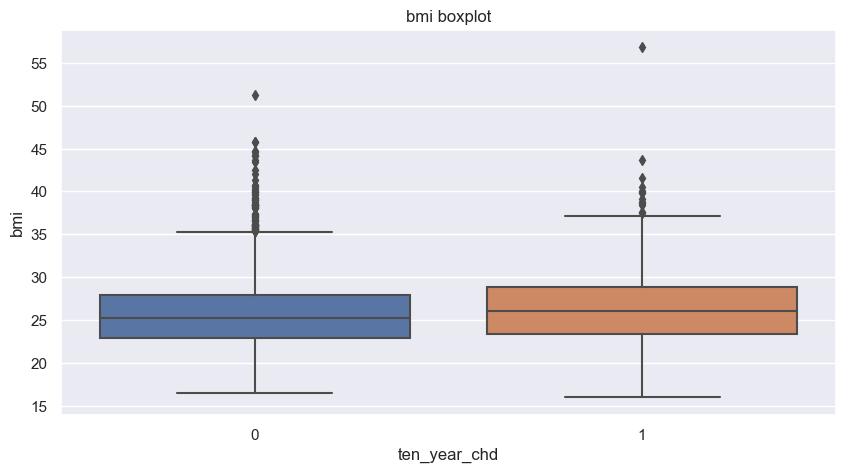

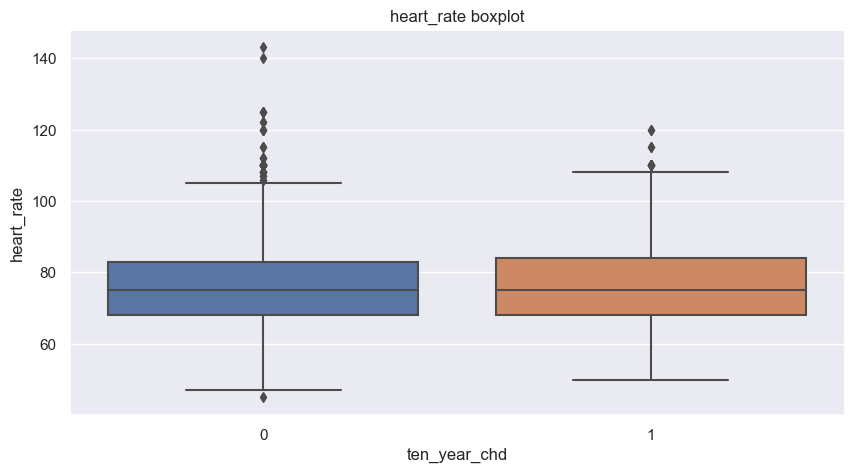

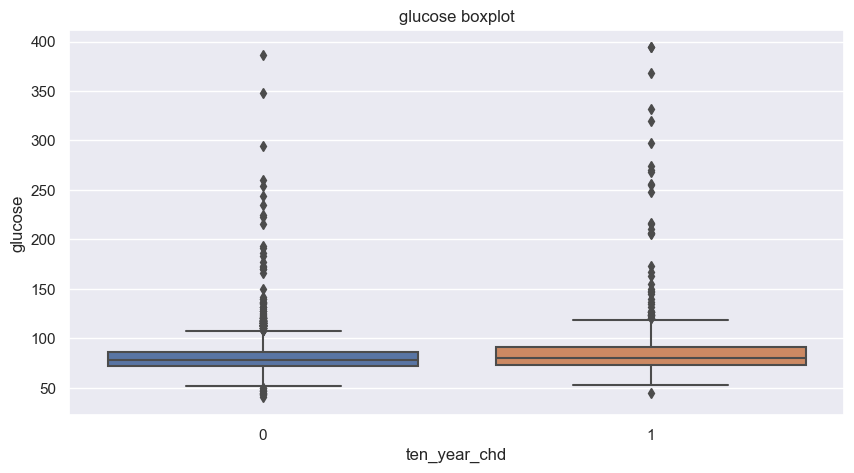

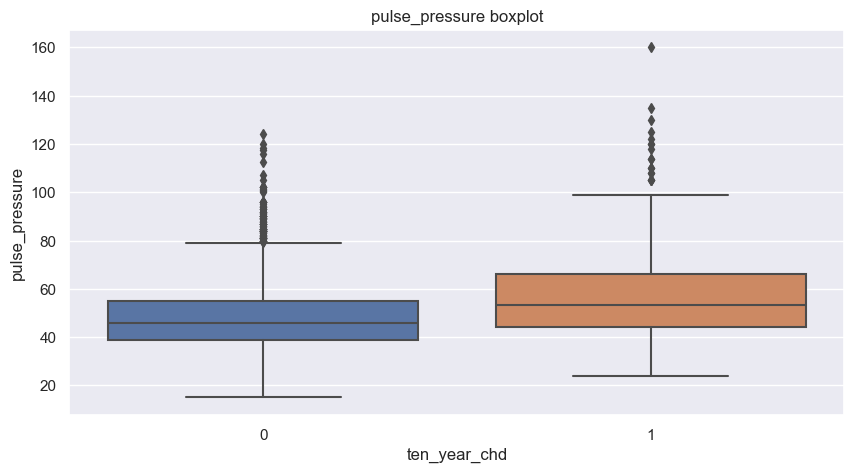

In [151]:
for col in continuous_var:
  plt.figure(figsize=(10,5))
  sns.boxplot(y = col,x = dependent_var[0],data=cardio)
  plt.title(col+' boxplot')
  plt.show()

In [153]:
(cardio[continuous_var]).skew(axis = 0)

age                  0.225796
cigs_per_day         1.204077
total_cholesterol    0.948170
bmi                  1.025551
heart_rate           0.676660
glucose              6.361911
pulse_pressure       1.412382
dtype: float64

In [155]:
np.log10(cardio[continuous_var]+1).skew(axis = 0)
     

age                 -0.015053
cigs_per_day         0.275072
total_cholesterol    0.011860
bmi                  0.370422
heart_rate           0.165898
glucose              2.310918
pulse_pressure       0.354174
dtype: float64

In [157]:
cardio['age']                   = np.log10(cardio['age']+1)
cardio['cigs_per_day']          = np.log10(cardio['cigs_per_day']+1)
cardio['total_cholesterol']     = np.log10(cardio['total_cholesterol']+1)
cardio['bmi']                   = np.log10(cardio['bmi']+1)
cardio['heart_rate']            = np.log10(cardio['heart_rate']+1)
cardio['glucose']               = np.log10(cardio['glucose']+1)
cardio['pulse_pressure']        = np.log10(cardio['pulse_pressure']+1)

In [159]:
cardio[continuous_var].skew(axis = 0)

age                 -0.015053
cigs_per_day         0.275072
total_cholesterol    0.011860
bmi                  0.370422
heart_rate           0.165898
glucose              2.310918
pulse_pressure       0.354174
dtype: float64

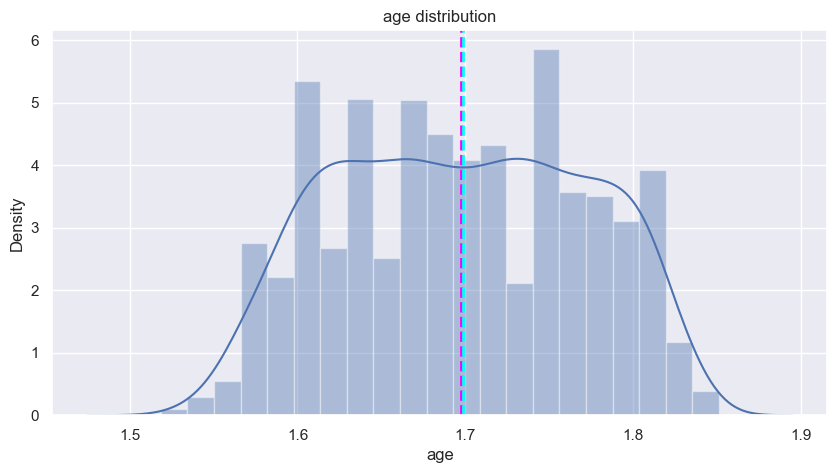

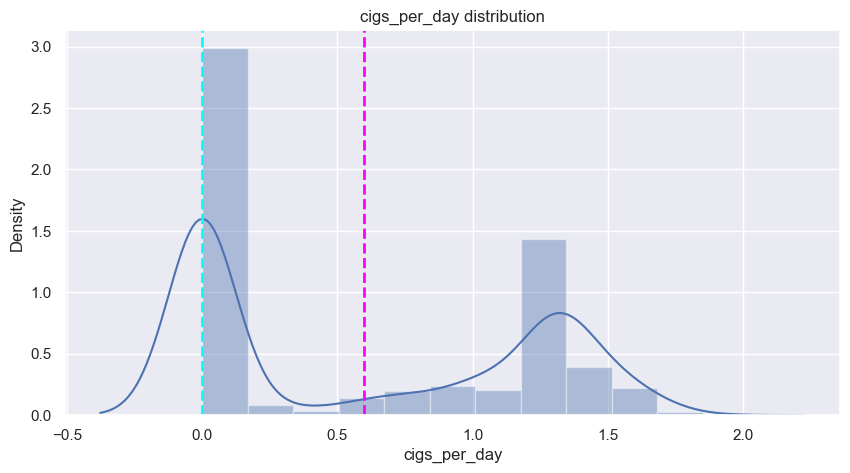

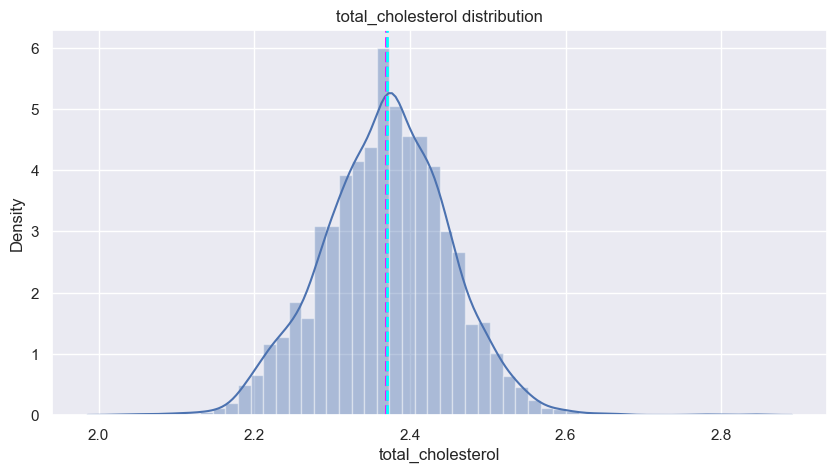

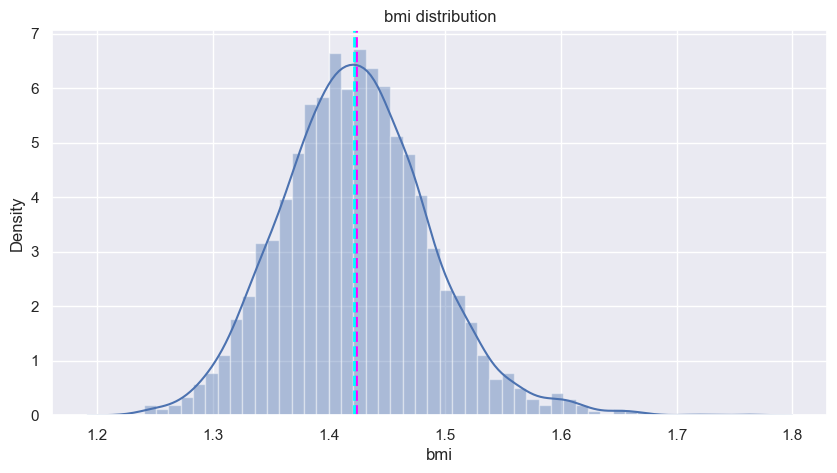

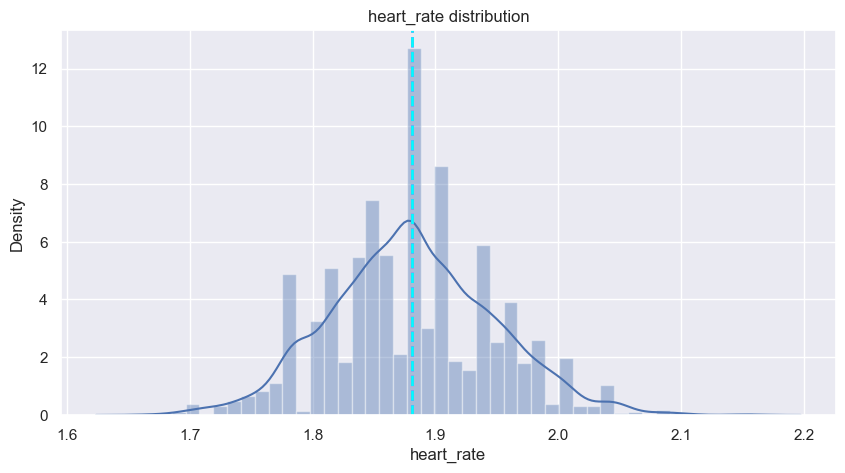

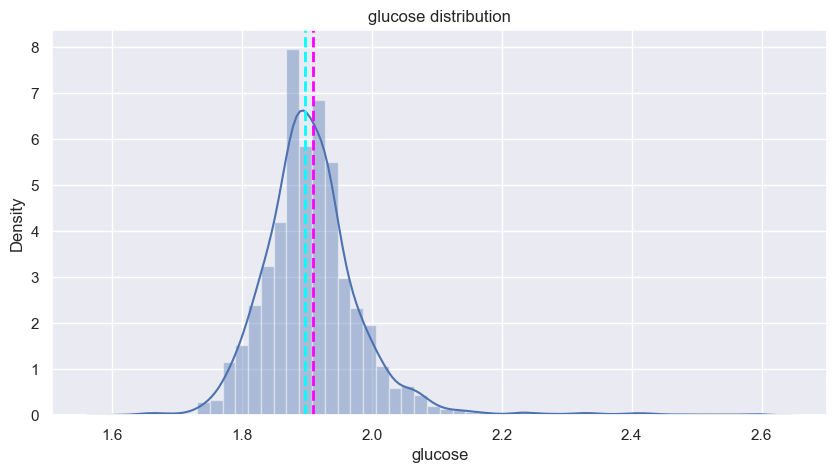

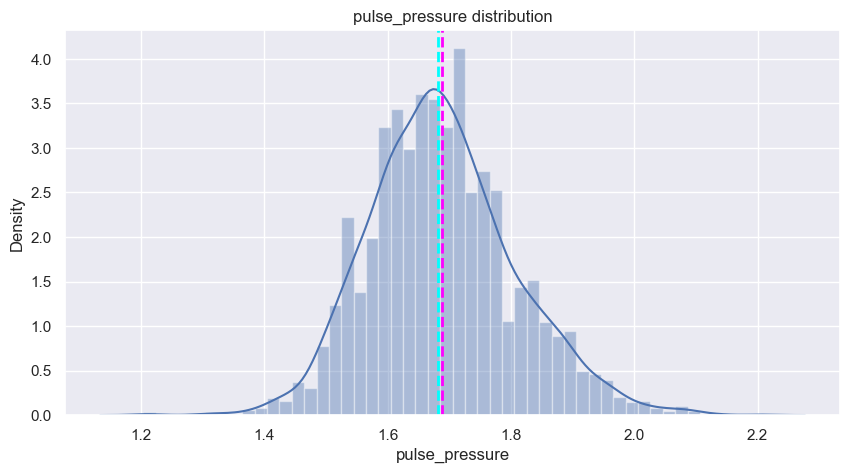

In [161]:
for col in continuous_var:
  plt.figure(figsize=(10,5))
  sns.distplot(cardio[col])
  plt.axvline(cardio[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(cardio[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

In [163]:
X = cardio.drop('ten_year_chd',axis=1)
y = cardio[dependent_var]

In [165]:
def recall(actual,predicted):
  '''
  recall(actual,predicted)
  '''
  return recall_score(y_true=actual, y_pred=predicted, average='binary')

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y, shuffle=True)

In [169]:
y_train.value_counts()

ten_year_chd
0               2015
1                358
Name: count, dtype: int64

In [171]:
358/(358+2015)

0.15086388537715972

In [173]:
y_test.value_counts()

ten_year_chd
0               864
1               153
Name: count, dtype: int64

In [175]:
153/(153+864)

0.1504424778761062

In [177]:
for i in ['total_cholesterol', 'bmi', 'heart_rate', 'glucose','pulse_pressure']:
  upper_lim = X_train[i].mean() + 3 * X_train[i].std()
  lower_lim = X_train[i].mean() - 3 * X_train[i].std()
  X_train.loc[(X_train[i] > upper_lim),i] = X_train[i].median()
  X_train.loc[(X_train[i] < lower_lim),i] = X_train[i].median()
     

X_train[continuous_var].skew(axis = 0)

age                 -0.035936
cigs_per_day         0.297586
total_cholesterol   -0.046628
bmi                  0.215412
heart_rate           0.074472
glucose              0.379615
pulse_pressure       0.270388
dtype: float64

<Axes: title={'center': 'Target variable before SMOTE'}, xlabel='ten_year_chd'>

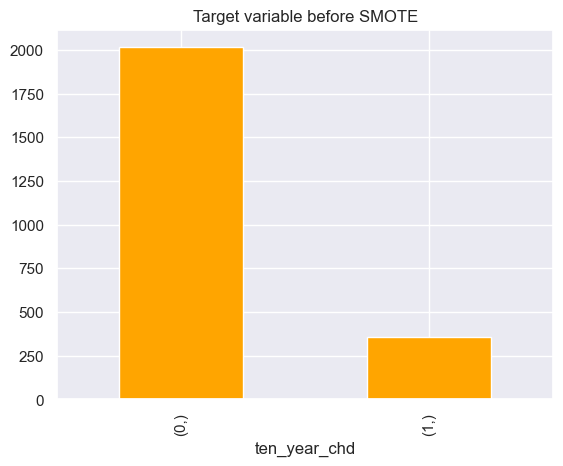

In [179]:
y_train.value_counts().plot(kind='bar', title='Target variable before SMOTE', color= 'orange')

In [183]:
smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Samples in the original dataset', len(y_train))
print('Samples in the resampled dataset', len(y_smote))

Samples in the original dataset 2373
Samples in the resampled dataset 4030


<Axes: title={'center': 'Target variable after SMOTE'}, xlabel='ten_year_chd'>

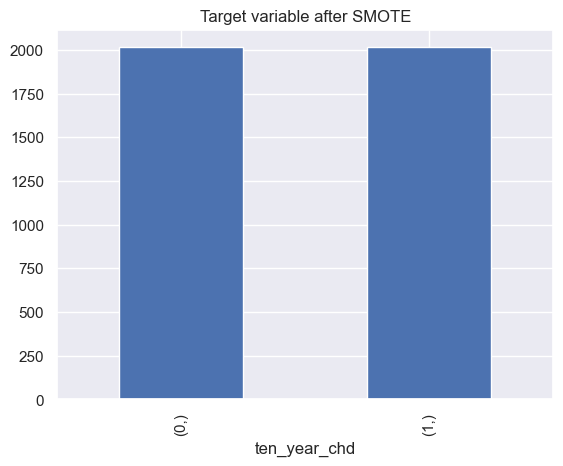

In [185]:
y_smote.value_counts().plot(kind='bar', title='Target variable after SMOTE')

In [187]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_smote_scaled = scaler.fit_transform(X_smote)
X_test_scaled = scaler.transform(X_test)

# Converting array to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_smote_scaled = pd.DataFrame(X_smote_scaled,columns=X_smote.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)
     

# Scaled train values
X_train_scaled.head()

,age,education,sex,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,bmi,heart_rate,glucose,pulse_pressure
0,1.352753,1.042877,1.126340,1.152968,-0.178155,-0.087426,-0.685091,-0.171759,0.279319,-0.546622,-0.267146,-0.521222,0.021221
1,0.238381,-0.929033,1.126340,1.418967,-0.178155,-0.087426,-0.685091,-0.171759,0.165020,0.828332,-0.454995,-1.079829,-0.058061
2,0.872536,-0.929033,1.126340,1.152968,-0.178155,-0.087426,-0.685091,-0.171759,0.714396,0.670299,-0.175143,1.533689,-0.392623
3,1.444209,-0.929033,-0.887831,-0.926396,-0.178155,-0.087426,1.459660,-0.171759,2.429594,0.459589,0.841085,1.727057,1.281191
4,0.457551,-0.929033,-0.887831,1.152968,-0.178155,-0.087426,-0.685091,-0.171759,0.211021,-1.740096,-0.454995,-0.432546,0.021221


In [189]:
X_smote_scaled.head()

,age,education,sex,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,bmi,heart_rate,glucose,pulse_pressure
0,1.196750,1.136543,1.053016,1.099910,-0.193192,-0.075762,-0.807661,-0.174433,0.211241,-0.659072,-0.289869,-0.557493,-0.151896
1,0.018707,-0.858782,1.053016,1.362689,-0.193192,-0.075762,-0.807661,-0.174433,0.088655,0.783889,-0.490563,-1.143797,-0.233549
2,0.689095,-0.858782,1.053016,1.099910,-0.193192,-0.075762,-0.807661,-0.174433,0.677862,0.618040,-0.191574,1.599303,-0.578117
3,1.293431,-0.858782,-0.949653,-0.954286,-0.193192,-0.075762,1.238143,-0.174433,2.517416,0.396908,0.894142,1.802258,1.145756
4,0.250400,-0.858782,-0.949653,1.099910,-0.193192,-0.075762,-0.807661,-0.174433,0.137992,-1.911577,-0.490563,-0.464420,-0.151896


In [191]:
X_test_scaled.head()


,age,education,sex,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,bmi,heart_rate,glucose,pulse_pressure
0,-1.747408,0.138881,1.053016,1.099910,-0.193192,-0.075762,1.238143,-0.174433,0.402288,0.776543,0.461407,-1.564156,-0.762338
1,-0.733963,2.134206,1.053016,0.254647,-0.193192,-0.075762,1.238143,-0.174433,-0.242373,0.898024,-1.828128,0.484534,0.967078
2,-1.440388,0.138881,-0.949653,-0.954286,-0.193192,-0.075762,-0.807661,-0.174433,-1.457800,-1.405648,-0.490563,-0.016923,-0.359275
3,-0.346100,-0.858782,-0.949653,-0.954286,-0.193192,-0.075762,-0.807661,-0.174433,0.984068,0.443212,-0.289869,-0.192472,0.376892
4,-0.868894,0.138881,-0.949653,1.362689,-0.193192,-0.075762,-0.807661,-0.174433,0.211241,-0.343921,-1.128434,0.069212,-0.445366


In [195]:
lr_model = LogisticRegression()

lr_model.fit(X_smote_scaled, y_smote)


LogisticRegression()

In [197]:
lr_train_pred = lr_model.predict(X_smote_scaled)

lr_train_recall = recall(y_smote,lr_train_pred)
lr_train_recall

0.6803970223325062

In [199]:
lr_test_pred = lr_model.predict(X_test_scaled)

lr_test_recall = recall(y_test,lr_test_pred)
lr_test_recall
     

0.6862745098039216

In [201]:
print(classification_report(y_test,lr_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.67      0.78       864
           1       0.27      0.69      0.39       153

    accuracy                           0.68      1017
   macro avg       0.60      0.68      0.58      1017
weighted avg       0.83      0.68      0.72      1017



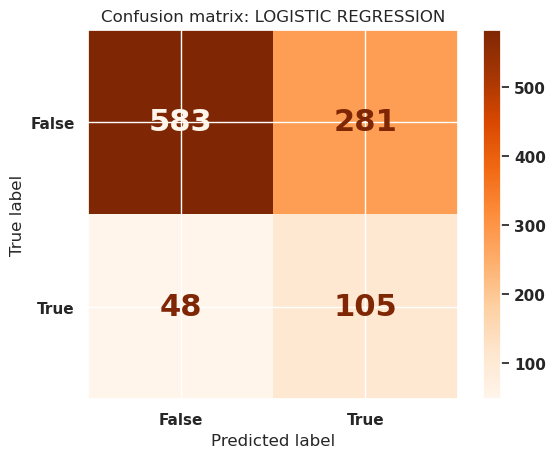

In [203]:
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import ConfusionMatrixDisplay as cmd
lr_confusion_matrix = cm(y_test, lr_test_pred)
cm_display = cmd(confusion_matrix = lr_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: LOGISTIC REGRESSION')
plt.show()

In [205]:
knn_test_res = []
knn_train_res = []
for k in range(1,65):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_smote_scaled, y_smote)
  knn_train_pred = knn_model.predict(X_smote_scaled)
  knn_train_recall = recall(y_smote,knn_train_pred)
  knn_test_pred = knn_model.predict(X_test_scaled)
  knn_test_recall = recall(y_test,knn_test_pred)
  knn_test_res.append(knn_test_recall)
  knn_train_res.append(knn_train_recall)

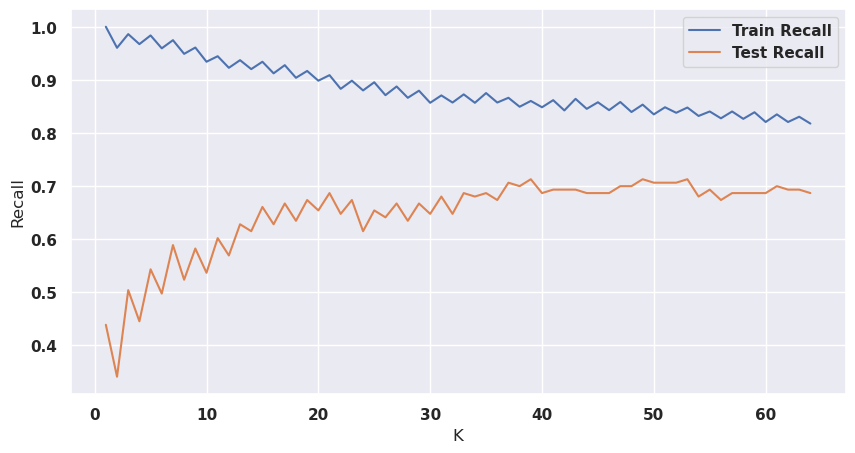

In [206]:
plt.figure(figsize=(10,5))
x_ = range(1,65)
y1 = knn_train_res
y2 = knn_test_res
plt.plot(x_, y1, label='Train Recall')
plt.plot(x_, y2, label = 'Test Recall')
plt.xlabel('K')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [207]:
best_k = knn_test_res.index(max(knn_test_res))+1
best_k

39

In [208]:
knn_model = KNeighborsClassifier(n_neighbors=best_k)
     

# training the model
knn_model.fit(X_smote_scaled, y_smote)

KNeighborsClassifier(n_neighbors=39)

In [209]:
knn_train_pred = knn_model.predict(X_smote_scaled)
     

# training set recall
knn_train_recall = recall(y_smote,knn_train_pred)
knn_train_recall

0.8600496277915632

In [215]:
knn_test_pred = knn_model.predict(X_test_scaled)
     

# Test recall
knn_test_recall = recall(y_test,knn_test_pred)
knn_test_recall

0.7124183006535948

In [217]:
print(classification_report(y_test,knn_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.57      0.70       864
           1       0.23      0.71      0.34       153

    accuracy                           0.59      1017
   macro avg       0.57      0.64      0.52      1017
weighted avg       0.81      0.59      0.65      1017



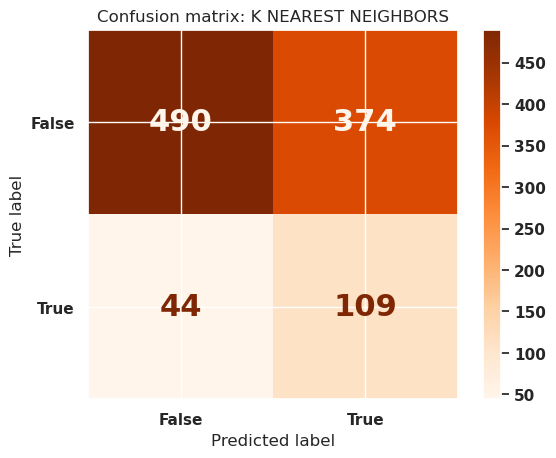

In [219]:
knn_confusion_matrix = cm(y_test, knn_test_pred)
cm_display = cmd(confusion_matrix = knn_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: K NEAREST NEIGHBORS')
plt.show()
     

In [221]:
cv_method = RepeatedStratifiedKFold(n_splits=4,
                                    n_repeats=3,
                                    random_state=0)

In [223]:
nb_model = GaussianNB()

In [225]:
nb_model = GaussianNB()
nb_params = {'var_smoothing': np.logspace(0,-9, num=100)
             }

In [227]:
nb_gridsearch = GridSearchCV(nb_model,
                             nb_params,
                             cv=cv_method,
                             scoring= 'recall')
nb_gridsearch.fit(X_smote_scaled,y_smote)
nb_best_params = nb_gridsearch.best_params_


In [228]:
nb_best_params

{'var_smoothing': 1.0}

In [229]:
nb_model = GaussianNB(var_smoothing=nb_best_params['var_smoothing'])
     

# training the model
nb_model.fit(X_smote_scaled, y_smote)


GaussianNB(var_smoothing=1.0)

In [233]:
nb_train_pred = nb_model.predict(X_smote_scaled)
     

# training set recall
nb_train_recall = recall(y_smote,nb_train_pred)
nb_train_recall

0.609925558312655

In [235]:
nb_test_pred = nb_model.predict(X_test_scaled)
     

# Test recall
nb_test_recall = recall(y_test,nb_test_pred)
nb_test_recall

0.5555555555555556

In [237]:
print(classification_report(y_test,nb_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81       864
           1       0.27      0.56      0.36       153

    accuracy                           0.70      1017
   macro avg       0.58      0.64      0.58      1017
weighted avg       0.81      0.70      0.74      1017



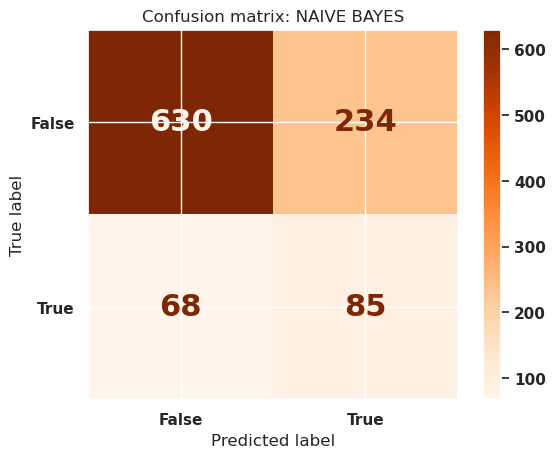

In [239]:
nb_confusion_matrix = cm(y_test, nb_test_pred)
cm_display = cmd(confusion_matrix = nb_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: NAIVE BAYES')
plt.show()